In [1]:
import numpy as np
import pandas as pd
from keras.utils import np_utils
from keras.datasets import mnist
from keras.layers import Dense,Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
np.random.seed(10)

Using TensorFlow backend.


ImportError: Could not find 'cudart64_100.dll'. TensorFlow requires that this DLL be installed in a directory that is named in your %PATH% environment variable. Download and install CUDA 10.0 from this URL: https://developer.nvidia.com/cuda-90-download-archive

In [2]:
(x_train_image,y_train_lebel),(x_test_image,y_test_lebel)=mnist.load_data()

In [3]:
print('訓練用data數量:',len(x_train_image))
print('測試用data數量:',len(x_test_image))
print('訓練用data數量:',x_train_image.shape)
print('測試用data數量:',y_test_lebel.shape)

訓練用data數量: 60000
測試用data數量: 10000
訓練用data數量: (60000, 28, 28)
測試用data數量: (10000,)


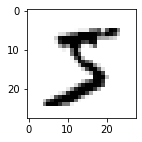

5


In [4]:
def show_image(image):
    figure=plt.gcf()
    figure.set_size_inches(2,2)
    plt.imshow(image,cmap='binary')
    plt.show()

show_image(x_train_image[0])
print(y_train_lebel[0])
    
    

In [5]:
x_train=x_train_image.reshape(60000,784).astype('float32') #28*28=>784*1
x_test=x_test_image.reshape(10000,784).astype('float32')
print('轉換一維向量:',x_train.shape)

轉換一維向量: (60000, 784)


In [6]:
x_train_normalization=x_train/255 # rgb normalization
x_test_normalization=x_test/255

x_test_normalization[0] #range:0~1


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [7]:
y_train_onehot=np_utils.to_categorical(y_train_lebel) # One hot encoding:為每個類別新增一個欄位，用 0/1表示是/否
y_test_onehot=np_utils.to_categorical(y_test_lebel)

In [8]:
model=Sequential() # 線性堆疊模型
model.add(Dense(units=530,input_dim=784,kernel_initializer='normal',activation='relu')) # 輸入層/隱藏層(530),隱藏層大小:(輸入大小+輸出大小)*2/3
model.add(Dropout(0.5)) # 每次訓練會隨機放棄50%的神經元，避免overfitting(acc/val_acc差距過大)
model.add(Dense(units=10,kernel_initializer='normal',activation='softmax')) # 輸出層，softmax用於將輸出轉換為機率
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 530)               416050    
_________________________________________________________________
dropout_1 (Dropout)          (None, 530)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5310      
Total params: 421,360
Trainable params: 421,360
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(x=x_train_normalization,y=y_train_onehot,validation_split=0.2,epochs=10,batch_size=200,verbose=2)
# x,y是輸入的訓練參數值,validation_split是把x的data的80%資料做訓練，20%做測試，epochs訓練週期，batch_size一次200筆資料
#verbose=2顯示訓練過程

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4338 - accuracy: 0.8731 - val_loss: 0.1942 - val_accuracy: 0.9468
Epoch 2/10
 - 1s - loss: 0.2017 - accuracy: 0.9417 - val_loss: 0.1355 - val_accuracy: 0.9615
Epoch 3/10
 - 1s - loss: 0.1502 - accuracy: 0.9560 - val_loss: 0.1136 - val_accuracy: 0.9675
Epoch 4/10
 - 1s - loss: 0.1220 - accuracy: 0.9644 - val_loss: 0.1013 - val_accuracy: 0.9698
Epoch 5/10
 - 1s - loss: 0.1019 - accuracy: 0.9704 - val_loss: 0.0918 - val_accuracy: 0.9725
Epoch 6/10
 - 1s - loss: 0.0882 - accuracy: 0.9740 - val_loss: 0.0866 - val_accuracy: 0.9737
Epoch 7/10
 - 1s - loss: 0.0743 - accuracy: 0.9776 - val_loss: 0.0818 - val_accuracy: 0.9765
Epoch 8/10
 - 1s - loss: 0.0703 - accuracy: 0.9786 - val_loss: 0.0760 - val_accuracy: 0.9778
Epoch 9/10
 - 1s - loss: 0.0596 - accuracy: 0.9814 - val_loss: 0.0718 - val_accuracy: 0.9786
Epoch 10/10
 - 1s - loss: 0.0560 - accuracy: 0.9824 - val_loss: 0.0699 - val_accuracy: 0.9793


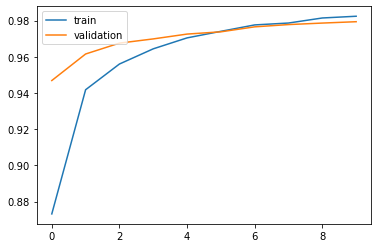

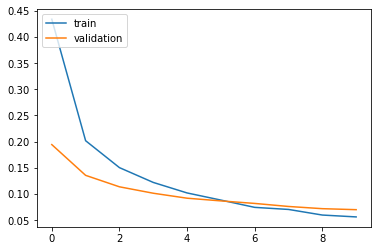

In [10]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
#     plt.title['Train History'] # 不明原因bug
#     plt.ylabel[train]
#     plt.xlabel['epochs']
    plt.legend(['train','validation'],loc='upper left')
    plt.show()
    
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

In [1]:
scores=model.evaluate(x_test_normalization,y_test_onehot) # 用test data評估model準確率

print('accuracy:',scores[1])

NameError: name 'model' is not defined

predict: 3
predict: 6
predict: 1
predict: 3
predict: 8
predict: 1
predict: 0
predict: 5
predict: 1
predict: 3
實際結果:


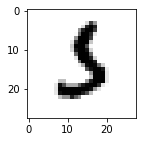

實際結果:


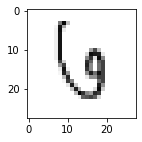

實際結果:


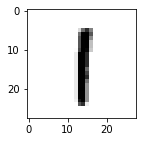

實際結果:


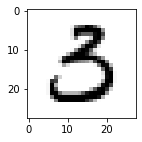

實際結果:


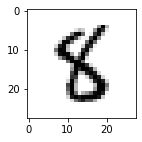

實際結果:


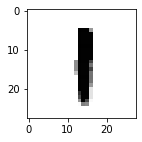

實際結果:


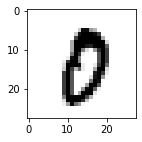

實際結果:


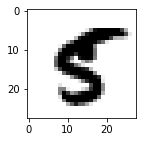

實際結果:


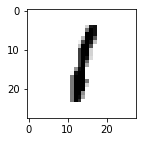

實際結果:


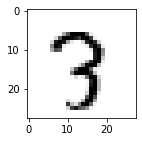

In [12]:
prediction=model.predict_classes(x_test)
for i in range(340,350):
    print('predict:',prediction[i])

for i in range(10):
    print('實際結果:')
    show_image(x_test_image[340+i])

In [13]:
pd.crosstab(y_test_lebel,prediction,rownames=['reality'],colnames=['predict'])
# 對角線表示實際和預測一樣
# 發現 5/3最容易搞混

predict,0,1,2,3,4,5,6,7,8,9
reality,,,,,,,,,,
0,973,0,1,2,0,0,1,1,2,0
1,0,1124,3,1,0,0,2,0,5,0
2,4,1,1013,2,1,0,2,4,5,0
3,0,0,2,997,0,4,0,4,3,0
4,0,0,5,0,958,0,4,1,2,12
5,3,0,0,9,1,864,6,1,6,2
6,5,3,0,1,2,3,942,0,2,0
7,2,7,12,3,0,0,0,994,2,8
8,4,0,3,6,3,1,1,2,953,1
